In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#CREATING THE DATASET FOR HYPOTHESIS
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 500  # Number of individuals
age = np.random.randint(20, 80, size=n)  # Age between 20 and 80
bmi = np.random.normal(loc=25, scale=5, size=n)  # BMI with mean 25 and std 5
blood_pressure = np.random.normal(loc=120, scale=15, size=n)  # Systolic BP with mean 120
diabetes_status = np.random.choice([0, 1], size=n, p=[0.8, 0.2])  # 20% diabetic, 80% non-diabetic
smoker_status = np.random.choice([0, 1], size=n, p=[0.7, 0.3])  # 30% smokers

# Create DataFrame
df = pd.DataFrame({
    "Age": age,
    "BMI": bmi,
    "Blood_Pressure": blood_pressure,
    "Diabetes": diabetes_status,
    "Smoker": smoker_status
})

# Save to CSV
df.to_csv("health_data.csv", index=False)

print("Dataset generated and saved as 'health_data.csv'.")

Dataset generated and saved as 'health_data.csv'.


 Assumption Checks 
Normality p-values: Diabetic=0.976, Non-diabetic=0.658
Equal variance p-value (Levene's): 0.843


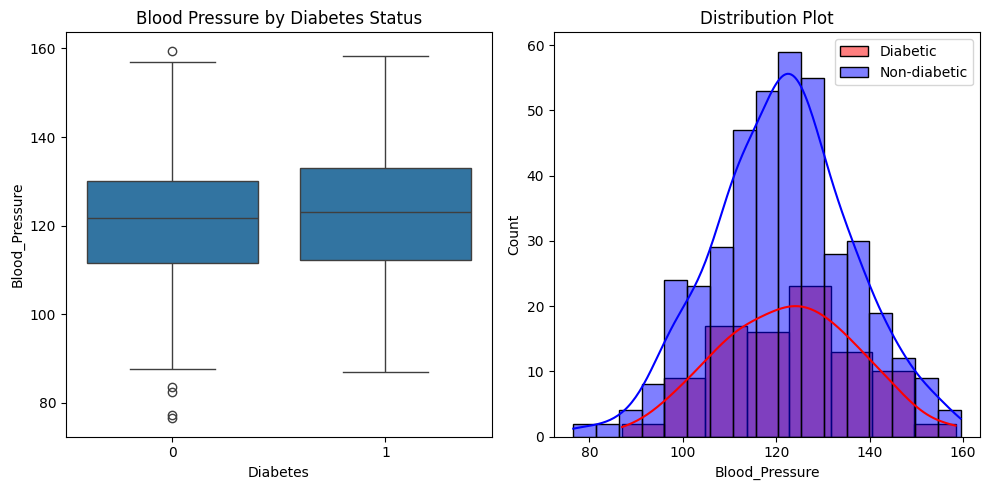


=== Hypothesis Test Results ===
Sample sizes: Diabetic=92, Non-diabetic=408
Mean BP: Diabetic=122.7, Non-diabetic=121.3
T-statistic: 0.8301
P-value: 0.4069
Cohen's d: 0.0959
95% CI for mean difference: (-1.91, 4.73)

Conclusion: Fail to reject H₀ - No significant difference in blood pressure.


In [3]:
# Separate blood pressure by diabetes status
bp_diabetic = df[df['Diabetes'] == 1]['Blood_Pressure']
bp_non_diabetic = df[df['Diabetes'] == 0]['Blood_Pressure']

# 1. Check assumptions
print(" Assumption Checks ")
# Normality
_, p_diabetic = stats.shapiro(bp_diabetic)
_, p_non_diabetic = stats.shapiro(bp_non_diabetic)
print(f"Normality p-values: Diabetic={p_diabetic:.3f}, Non-diabetic={p_non_diabetic:.3f}")

# Equal variance
_, p_levene = stats.levene(bp_diabetic, bp_non_diabetic)
print(f"Equal variance p-value (Levene's): {p_levene:.3f}")

# 2. Visualize distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Diabetes', y='Blood_Pressure', data=df)
plt.title("Blood Pressure by Diabetes Status")

plt.subplot(1, 2, 2)
sns.histplot(bp_diabetic, color='red', label='Diabetic', kde=True)
sns.histplot(bp_non_diabetic, color='blue', label='Non-diabetic', kde=True)
plt.legend()
plt.title("Distribution Plot")
plt.tight_layout()
plt.show()

# 3. Perform independent t-test
t_stat, p_value = stats.ttest_ind(bp_diabetic, bp_non_diabetic, equal_var=True)
print("\n=== Hypothesis Test Results ===")
print(f"Sample sizes: Diabetic={len(bp_diabetic)}, Non-diabetic={len(bp_non_diabetic)}")
print(f"Mean BP: Diabetic={bp_diabetic.mean():.1f}, Non-diabetic={bp_non_diabetic.mean():.1f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Calculate effect size
pooled_std = np.sqrt((bp_diabetic.std()**2 + bp_non_diabetic.std()**2)/2)
cohens_d = (bp_diabetic.mean() - bp_non_diabetic.mean()) / pooled_std
print(f"Cohen's d: {cohens_d:.4f}")

# 5. Confidence interval for mean difference
diff_mean = bp_diabetic.mean() - bp_non_diabetic.mean()
diff_se = pooled_std * np.sqrt(1/len(bp_diabetic) + 1/len(bp_non_diabetic))
ci_low = diff_mean - 1.96 * diff_se
ci_high = diff_mean + 1.96 * diff_se
print(f"95% CI for mean difference: ({ci_low:.2f}, {ci_high:.2f})")

# 6. Conclusion
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject H₀ - Diabetics have significantly different blood pressure.")
else:
    print("\nConclusion: Fail to reject H₀ - No significant difference in blood pressure.")

In [4]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 250  # Number of employees per group
work_hours_A = np.random.uniform(6, 8, size=n)  # Group A: 6-8 hours/day
work_hours_B = np.random.uniform(9, 12, size=n)  # Group B: 9-12 hours/day
performance_A = np.random.normal(loc=70, scale=10, size=n)  # Group A: Mean 70, Std Dev 10
performance_B = np.random.normal(loc=85, scale=12, size=n)  # Group B: Mean 85, Std Dev 12

# Create DataFrame
df = pd.DataFrame({
    "Employee_ID": range(1, n*2+1),
    "Group": ["A"]*n + ["B"]*n,
    "Work_Hours": np.concatenate([work_hours_A, work_hours_B]),
    "Performance_Score": np.concatenate([performance_A, performance_B])
})

# Save to CSV
df.to_csv("employee_performance.csv", index=False)

print("Dataset generated and saved as 'employee_performance.csv'.")

Dataset generated and saved as 'employee_performance.csv'.


Missing values per column:
 Employee_ID          0
Group                0
Work_Hours           0
Performance_Score    0
dtype: int64


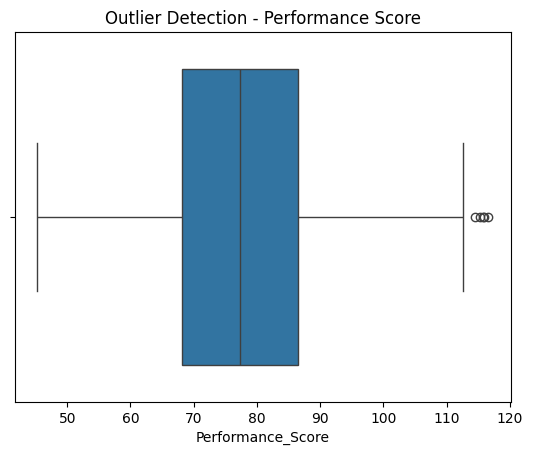

Duplicate entries found: 0


/tmp/ipython-input-6-3862451584.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [6]:
#CLEANING THE DATASET
# Load dataset
df = pd.read_csv("/content/employee_performance.csv")

### 1. Check for Missing Values ###
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# If missing values exist, fill with median (for robustness)
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)


### 2. Check for Outliers (Using Boxplots) ###
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Performance_Score"])
plt.title("Outlier Detection - Performance Score")
plt.show()

# Remove extreme outliers (beyond 1st & 99th percentile)
df = df[df["Performance_Score"].between(df["Performance_Score"].quantile(0.01), df["Performance_Score"].quantile(0.99))]

### 3. Check for Duplicate Entries ###
duplicates = df.duplicated().sum()
print("Duplicate entries found:", duplicates)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
import scipy.stats as stats

# Separate scores for Group A and Group B
scores_A = df[df["Group"] == "A"]["Performance_Score"]
scores_B = df[df["Group"] == "B"]["Performance_Score"]

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(scores_A, scores_B, alternative="two-sided")

print(f"Mann-Whitney U Test for Performance Scores:")
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision based on p-value
if p_value < 0.05:
    print("Conclusion: Reject H₀ - Performance score distributions are significantly different.")
else:
    print("Conclusion: Fail to reject H₀ - No significant difference in performance scores.")


Mann-Whitney U Test for Performance Scores:
U-statistic: 9846.0000
P-value: 0.0000
Conclusion: Reject H₀ - Performance score distributions are significantly different.


In [8]:
#LINEAR REGRESSION ANALYSIS
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

# Generate synthetic dataset
n = 500
size_sqft = np.random.randint(800, 4000, size=n)
bedrooms = np.random.randint(1, 6, size=n)
bathrooms = np.random.randint(1, 4, size=n)
garage = np.random.choice([0, 1], size=n, p=[0.4, 0.6])
distance_to_city = np.random.uniform(1, 50, size=n)
price = size_sqft * np.random.uniform(0.08, 0.12, size=n) + (bedrooms * 10) + (bathrooms * 15) - (distance_to_city * 5) + (garage * 20)

# Create DataFrame
df1 = pd.DataFrame({
    "House_ID": range(1, n+1),
    "Size_sqft": size_sqft,
    "Bedrooms": bedrooms,
    "Bathrooms": bathrooms,
    "Garage": garage,
    "Distance_to_City_Center": distance_to_city,
    "Price": price
})

# Save to CSV
df1.to_csv("house_prices.csv", index=False)

print("Dataset generated and saved as 'house_prices.csv'.")


Dataset generated and saved as 'house_prices.csv'.


Missing values:
 House_ID                   0
Size_sqft                  0
Bedrooms                   0
Bathrooms                  0
Garage                     0
Distance_to_City_Center    0
Price                      0
dtype: int64
Duplicate entries: 0


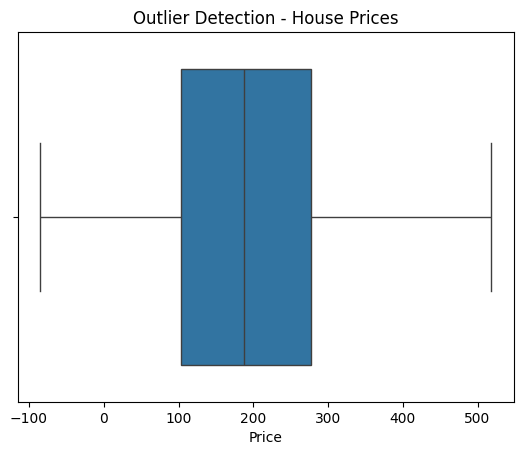

In [9]:
#cleaning the dataset
# Load dataset
df1 = pd.read_csv("/content/house_prices.csv")

# Check for missing values
print("Missing values:\n", df1.isnull().sum())

# Check for duplicates
print("Duplicate entries:", df1.duplicated().sum())

# Remove duplicates if any exist
df1.drop_duplicates(inplace=True)

# Check for outliers using boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df1["Price"])
plt.title("Outlier Detection - House Prices")
plt.show()

# Remove extreme outliers (beyond 1st & 99th percentile)
df1 = df1[df1["Price"].between(df1["Price"].quantile(0.01), df1["Price"].quantile(0.99))]


In [10]:
#Linear Regression Analysis
# dependent variable (Y) = price
#Independent variable (X) = Size_sqft, Bedrroms, Bathrooms, Garage, Distance_to_city_center

import statsmodels.api as sm

# Define dependent & independent variables
X = df1[["Size_sqft", "Bedrooms", "Bathrooms", "Garage", "Distance_to_City_Center"]]
y = df1["Price"]

# Add constant term for regression
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1414.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          4.35e-286
Time:                        20:15:21   Log-Likelihood:                -2351.1
No. Observations:                 490   AIC:                             4714.
Df Residuals:                     484   BIC:                             4739.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

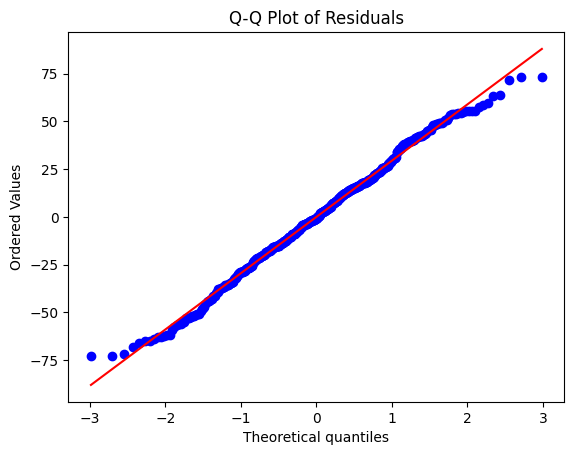

In [11]:
import scipy.stats as stats
stats.probplot(model.resid, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

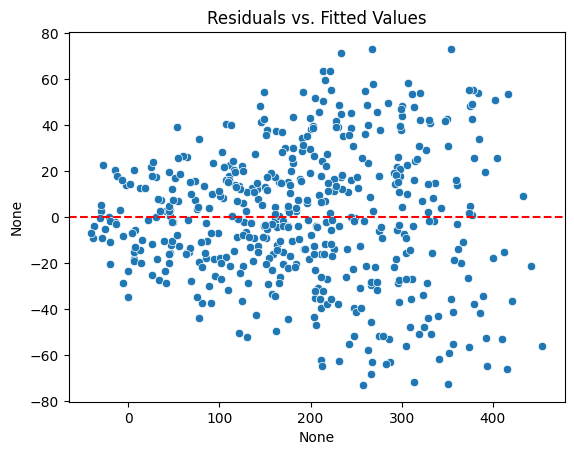

In [12]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Variable": X.columns, "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})
print(vif)

                  Variable        VIF
0                    const  24.999907
1                Size_sqft   1.005611
2                 Bedrooms   1.004654
3                Bathrooms   1.005793
4                   Garage   1.005811
5  Distance_to_City_Center   1.004806


In [15]:
#ANOVA Analysis
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

# Fit the model using the formula API
# The formula should be 'dependent_variable ~ independent_variable1 + independent_variable2 + ...'
# In this case, 'Price ~ Size_sqft + Bedrooms + Bathrooms + Garage + Distance_to_City_Center'
model_formula = smf.ols('Price ~ Size_sqft + Bedrooms + Bathrooms + Garage + Distance_to_City_Center', data=df1)
model_fitted = model_formula.fit()

# Perform ANOVA
anova_results = anova_lm(model_fitted)
print(anova_results)

                            df        sum_sq       mean_sq            F  \
Size_sqft                  1.0  3.611078e+06  3.611078e+06  4141.321018   
Bedrooms                   1.0  8.975555e+04  8.975555e+04   102.935058   
Bathrooms                  1.0  9.374345e+04  9.374345e+04   107.508534   
Garage                     1.0  5.125823e+04  5.125823e+04    58.784874   
Distance_to_City_Center    1.0  2.318186e+06  2.318186e+06  2658.583686   
Residual                 484.0  4.220300e+05  8.719629e+02          NaN   

                                PR(>F)  
Size_sqft                2.246119e-239  
Bedrooms                  4.645009e-22  
Bathrooms                 6.976375e-23  
Garage                    9.717823e-14  
Distance_to_City_Center  9.651798e-199  
Residual                           NaN  


In [16]:
#Since sm.OLS() directly fits a model on a Pandas dataframe, anova_lm() can't extract design matrix information. The fix is to use ols() from statsmodels.formula.api, which allows ANOVA computations.

#Solution: Use Formula-Based Regression
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Load your HOUSE PRICES dataset (not salary data)
df = pd.read_csv("/content/house_prices.csv")

# Fit model with formula (using actual columns from house_prices.csv)
model_formula = smf.ols(
    "Price ~ Size_sqft + Bedrooms + Bathrooms + Garage + Distance_to_City_Center",
    data=df
).fit()

# Perform ANOVA
anova_results = anova_lm(model_formula, typ=2)  # Type 2 ANOVA (recommended)
print(anova_results)

                               sum_sq     df            F         PR(>F)
Size_sqft                4.268986e+06    1.0  4738.820751  2.506673e-255
Bedrooms                 1.035931e+05    1.0   114.994352   2.912203e-24
Bathrooms                6.542618e+04    1.0    72.626834   1.911416e-16
Garage                   6.460998e+04    1.0    71.720804   2.853154e-16
Distance_to_City_Center  2.489943e+06    1.0  2763.980214  1.748632e-204
Residual                 4.450219e+05  494.0          NaN            NaN


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each independent variable
X_vars = df1[["Size_sqft", "Bedrooms", "Bathrooms", "Garage", "Distance_to_City_Center"]]
X_vars = sm.add_constant(X_vars)  # Add constant
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vars.columns
vif_data["VIF"] = [variance_inflation_factor(X_vars.values, i) for i in range(X_vars.shape[1])]

print(vif_data)

                   Feature        VIF
0                    const  24.999907
1                Size_sqft   1.005611
2                 Bedrooms   1.004654
3                Bathrooms   1.005793
4                   Garage   1.005811
5  Distance_to_City_Center   1.004806


In [18]:
#2nd dataset for linear regression
np.random.seed(42)

n = 400
years_experience = np.random.randint(1, 30, size=n)
education = np.random.choice([0, 1], size=n, p=[0.3, 0.7])
certifications = np.random.randint(0, 10, size=n)
industry = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
salary = years_experience * np.random.uniform(2000, 3000, size=n) + (education * 5000) + (certifications * 1000) + (industry * 7000)

df2 = pd.DataFrame({
    "Employee_ID": range(1, n+1),
    "Years_of_Experience": years_experience,
    "Education_Level": education,
    "Certifications": certifications,
    "Industry": industry,
    "Salary": salary
})

df2.to_csv("employee_salaries.csv", index=False)

print("Dataset generated and saved as 'employee_salaries.csv'.")

Dataset generated and saved as 'employee_salaries.csv'.


In [19]:
#Data Cleaning
df2 = pd.read_csv("/content/employee_salaries.csv")

# Handle missing values
df2.fillna(df2.median(), inplace=True)

# Remove duplicate records
df2.drop_duplicates(inplace=True)

# Remove outliers (beyond 1st & 99th percentile)
df2 = df2[df2["Salary"].between(df2["Salary"].quantile(0.01), df2["Salary"].quantile(0.99))]


In [20]:
#Linear Regression Analysis
X = df2[["Years_of_Experience", "Education_Level", "Certifications", "Industry"]]
y = df2["Salary"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     2194.
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          2.13e-264
Time:                        20:19:26   Log-Likelihood:                -3874.0
No. Observations:                 392   AIC:                             7758.
Df Residuals:                     387   BIC:                             7778.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -124.5829    

In [22]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

# Fit the model using the formula API
# The formula should be 'dependent_variable ~ independent_variable1 + independent_variable2 + ...'
model_formula = smf.ols('Salary ~ Years_of_Experience + Education_Level + Certifications + Industry', data=df2)
model_fitted = model_formula.fit()

# Perform ANOVA
anova_results = anova_lm(model_fitted, typ=2) # Use Type 2 ANOVA (recommended)
print(anova_results)

                           sum_sq     df            F         PR(>F)
Years_of_Experience  1.853088e+11    1.0  8144.927034  4.811523e-262
Education_Level      2.344555e+09    1.0   103.050836   1.266819e-21
Certifications       2.751479e+09    1.0   120.936498   1.158448e-24
Industry             4.230237e+09    1.0   185.932740   7.566615e-35
Residual             8.804807e+09  387.0          NaN            NaN


In [23]:
#Instead of sm.OLS(y, X), use ols() from statsmodels.formula.api:

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Convert to formula-based regression
model_formula = smf.ols("Salary ~ Years_of_Experience + Education_Level + Certifications + Industry", data=df2).fit()

# Perform ANOVA
anova_results = anova_lm(model_formula)
print(anova_results)

                        df        sum_sq       mean_sq            F  \
Years_of_Experience    1.0  1.911456e+11  1.911456e+11  8401.472610   
Education_Level        1.0  2.395888e+09  2.395888e+09   105.307123   
Certifications         1.0  1.918431e+09  1.918431e+09    84.321294   
Industry               1.0  4.230237e+09  4.230237e+09   185.932740   
Residual             387.0  8.804807e+09  2.275144e+07          NaN   

                            PR(>F)  
Years_of_Experience  1.557255e-264  
Education_Level       5.164938e-22  
Certifications        2.580670e-18  
Industry              7.566615e-35  
Residual                       NaN  


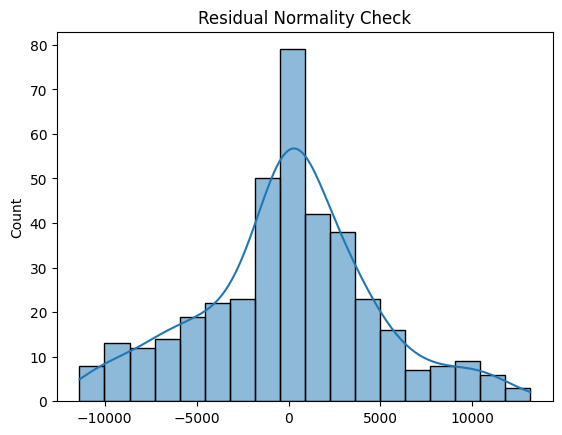

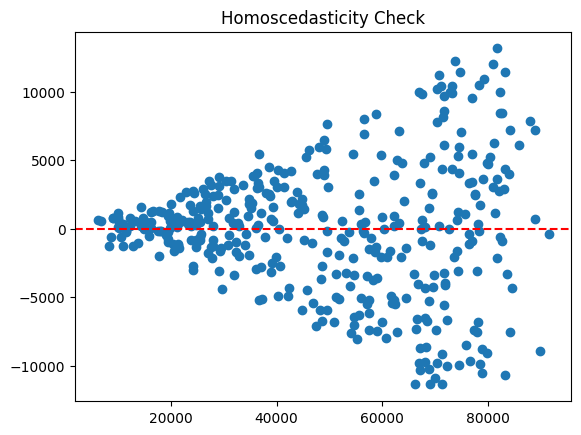

In [24]:
#Regression Assumptions Check
# Normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Residual Normality Check")
plt.show()

# Homoscedasticity check
plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homoscedasticity Check")
plt.show()
